<a href="https://colab.research.google.com/github/siva9640/DV-AMAZON-BEST-BOOK-SELLER/blob/main/GROUP_9_DV_MINI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA VISUALIZATION MINI PROJECT

GROUP-9

AMAZON BOOK SELLING DATA SET

7CSE-1

APPIKATLA NITHESH BABU(20181CSE0068)

A.K SRI LAKSHMI(20181CSE0004)

A.V.N YASWANTH(20181CSE0049)

ADURI SRUJAN BABU(20181CSE0028)

ALA SIVA SAI KIRAN TEJA(20181CSE0044)

**STEP 1**-Importing The Libraries used in the Project

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**STEP 2**-UPLOADING THE DATA SET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/bestsellers with categories.csv')
df.head()

,Name,Author,User Rating,Reviews,Year,Genre,type,language,Price
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,2016,Non Fiction,Paperback,English,8
1,11/22/63: A Novel,Stephen King,4.6,2052,2011,Fiction,Paperback,English,22
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,2018,Non Fiction,Paperback,Hindhi,15
3,1984 (Signet Classics),George Orwell,4.7,21424,2017,Fiction,Paperback,English,6
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,2019,Non Fiction,Paperback,English,12


To print the summary of statistics pertaining to the DataFrame

In [ ]:
df.describe()

,User Rating,Reviews,Year,Price
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,2014.000000,13.100000
std,0.226980,11731.132017,3.165156,10.842262
min,3.300000,37.000000,2009.000000,0.000000
25%,4.500000,4058.000000,2011.000000,7.000000
50%,4.700000,8580.000000,2014.000000,11.000000
75%,4.800000,17253.250000,2017.000000,16.000000
max,4.900000,87841.000000,2019.000000,105.000000


**STEP 3**-SHAPE, UNIQUE ELEMENTS,DUPLICATE SERIES AND FEATURES

Shape of Dataset
(550, 9)

unique elements in Features

Name           351
Author         248
User Rating     14
Reviews        346
Year            11
Genre            2
type             1
language         6
Price           40
dtype: int64

duplicated Series values
0

About Features : 

Name           100.0
Author         100.0
User Rating    100.0
Reviews        100.0
Year           100.0
Genre          100.0
type           100.0
language       100.0
Price          100.0
dtype: float64


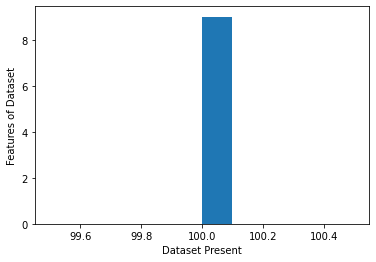

In [ ]:
print("Shape of Dataset")
print(df.shape)
print()
print("unique elements in Features")
print()
print(df.nunique())
print()
print("duplicated Series values")
print(df.duplicated().sum())
print()
print("About Features : ")
print()
print(df.count()/df.isna().count()*100)
x=df.count()/df.isna().count()*100
plt.hist(x)
plt.ylabel("Features of Dataset")
plt.xlabel("Dataset Present")
plt.show()
#or we can use df.info() to get basic info about data 
print()


**STEP 4-** HEAT MAP

Pairwise correlation of all columns in the dataframe




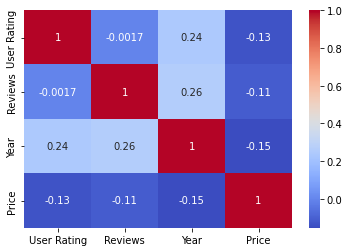

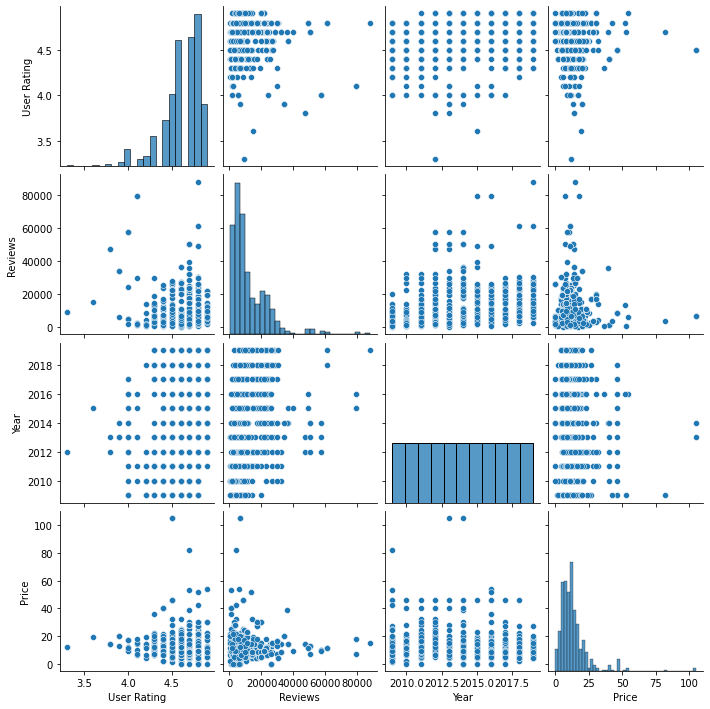

In [ ]:
print('\033[1m'+"Pairwise correlation of all columns in the dataframe")
print()
df.corr()
print()
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
sns.pairplot(df)

**STEP 5-**PIE CHART

- To visualise number of Non Fiction vs Fiction books in our data

Total fiction books : 240
Total non-fiction books : 310


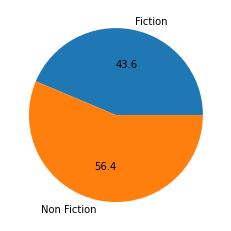

In [ ]:
G=df['Genre'] # assigning values of Genre to G
fs=0  #seting count of fiction books to zero
nfs=0  #seting count of non_fiction books to zero

for i in G:
  if(i=='Fiction'):
    fs=fs+1
  else:
    nfs=nfs+1
  
print('Total fiction books :',fs)
print('Total non-fiction books :',nfs)

slice=[fs,nfs]
labels=['Fiction','Non Fiction']
plt.pie(slice,labels=labels,autopct='%0.01f') #autopct enables you to display the percent value
plt.show()

 - How does Genre affect Ratings?

**STEP 6**-BAR GRAPH

The below graph shows the year wise genre of books published

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


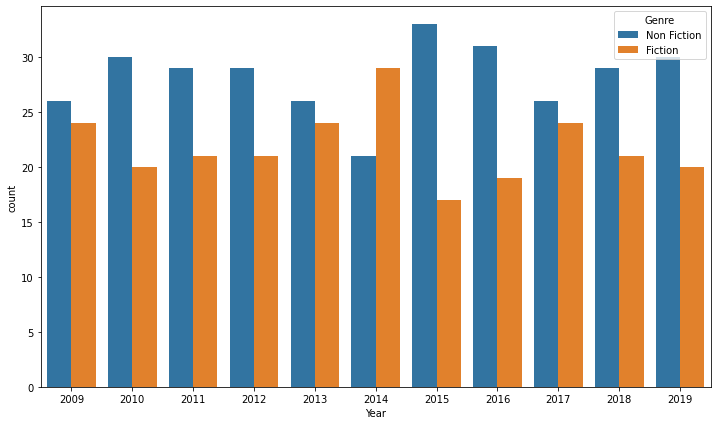

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(df['Year'],hue=df['Genre'])
plt.show()

**STEP 7-**AVERAGE RATING FOR FICTION AND NON FICTION

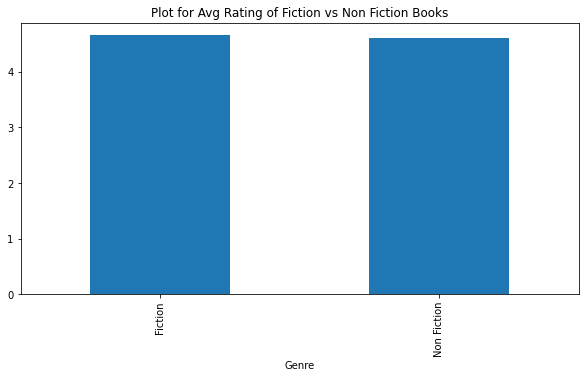

In [ ]:
data=df.groupby('Genre')['User Rating'].mean().plot(kind = 'bar', figsize = (10,5))
plt.title('Plot for Avg Rating of Fiction vs Non Fiction Books')
plt.show()

**STEP 8-**RATING FOR GENRE

In [ ]:
d1=df.groupby('Genre')['User Rating'].mean()
print(d1)

Genre
Fiction        4.648333
Non Fiction    4.595161
Name: User Rating, dtype: float64


**STEP 9-**Numbers of books written by every writter

In [ ]:
a=dict(df['Author'].value_counts())
b=list(a.items())

print(b[:10])

[('Jeff Kinney', 12), ('Suzanne Collins', 11), ('Rick Riordan', 11), ('Gary Chapman', 11), ('American Psychological Association', 10), ('Dr. Seuss', 9), ('Gallup', 9), ('Rob Elliott', 8), ('Eric Carle', 7), ('Stephen R. Covey', 7)]


**STEP 10-** Lets plot the top 10 authors that occur in out data

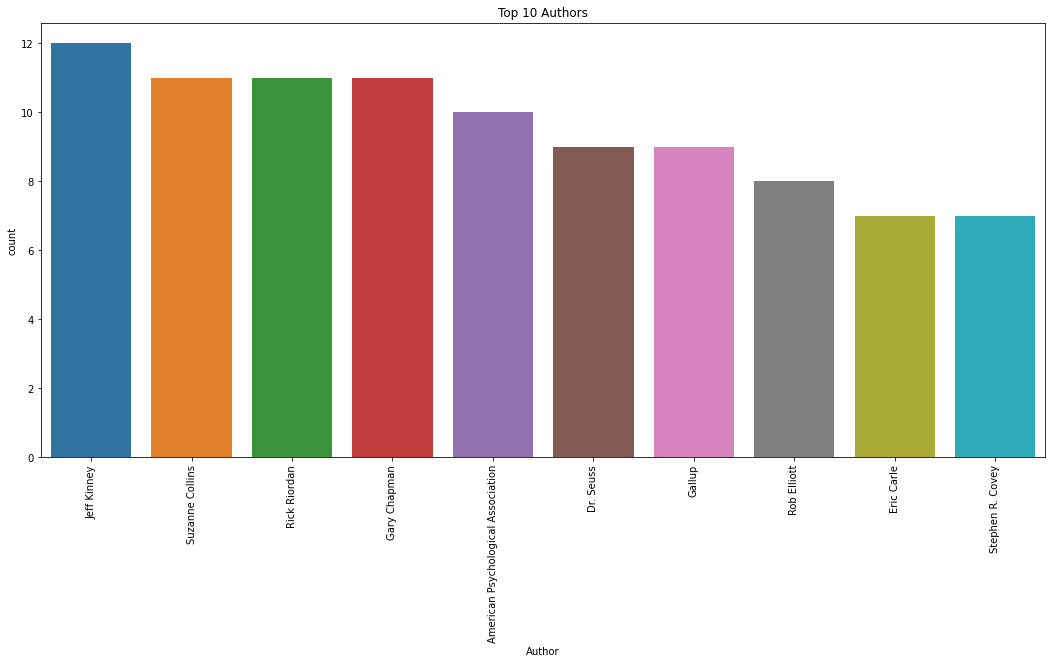

In [ ]:
plt.figure(figsize = (18,8))
sns.countplot(x = 'Author',
             data = df,
             order = df['Author'].value_counts().iloc[: 10].index)
plt.xticks(rotation = 90) # to rotate the words to understand them better
plt.title('Top 10 Authors')
plt.show()

we can see that, Jeff Kinney is at top place in our data

**STEP 11-**Which Author has maximum rating of 4.9 

In [ ]:
maxrating=df[df['User Rating']==4.9]
aumax=maxrating.groupby(['Author']).size().reset_index(name="Count")
aumax.sort_values(by='Count',ascending=False).head(20)

,Author,Count
5,Dr. Seuss,8
4,Dav Pilkey,7
7,Eric Carle,7
18,Sarah Young,6
6,Emily Winfield Martin,4
9,J.K. Rowling,3
19,Sherri Duskey Rinker,2
17,Rush Limbaugh,2
1,Bill Martin Jr.,2
13,Mark R. Levin,1


**STEP 12-** How does No.of Reviews (Reviews) affect Ratings ?

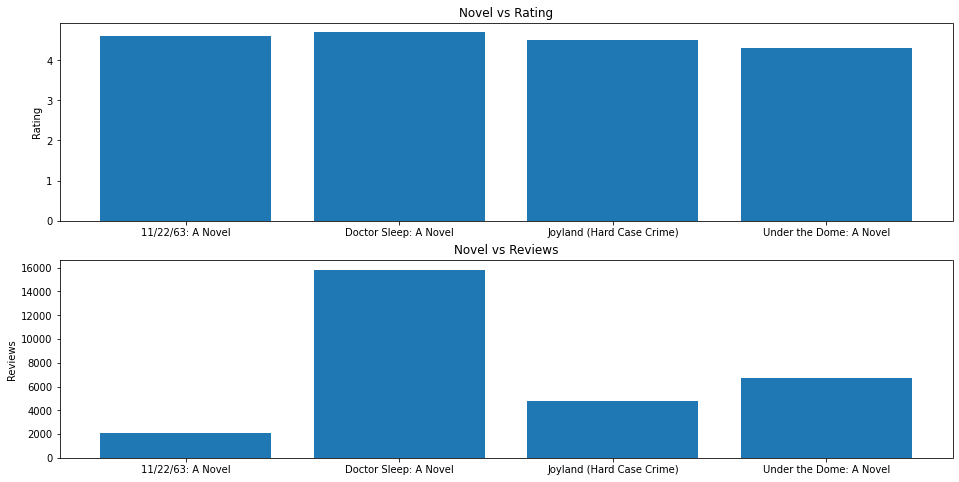

In [ ]:
# a data set for Stephen King
king = df[df['Author'] == 'Stephen King']

#plots
fig,(ax1,ax2) = plt.subplots(2,1, figsize = (16,8))

ax1.bar(king['Name'], king['User Rating'])
ax1.set_ylabel('Rating')
ax1.set_title('Novel vs Rating')

ax2.bar(king['Name'], king['Reviews'])
ax2.set_ylabel('Reviews')
ax2.set_title('Novel vs Reviews')


plt.show()

 Doctor Sleep : A Novel is the most reviewed and highest rated. It is also the sequel of the Stephen King classis, The Shining. Maybe the people who read and loved the shining bought this the most and were heavy on putting out their reviews. Based on the Ratings, that is around 4.7, they liked it. 

**STEP 13-** Top 10 writers in English and French ?

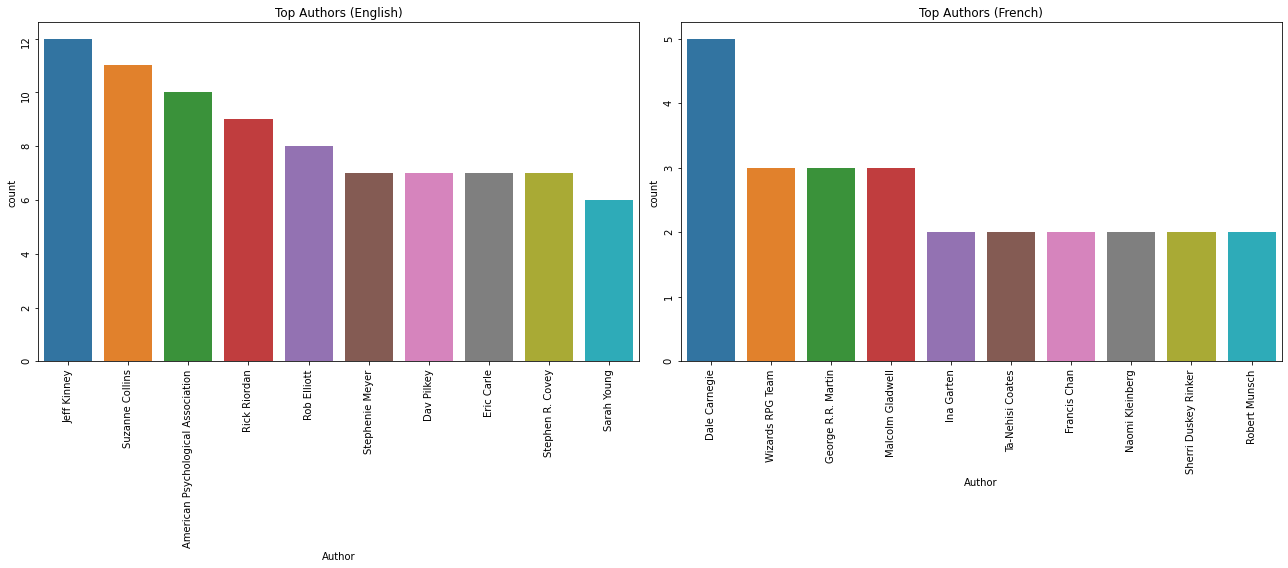

In [ ]:
english = df[df['language'] == 'English']
french =  df[df['language'] == 'French']

fig, ax = plt.subplots(1,2, figsize = (18,8))
sns.countplot(x = 'Author',
             data = english,
             order = english['Author'].value_counts().iloc[: 10].index,
             ax = ax[0])
ax[0].set_title('Top Authors (English)')
ax[0].tick_params(labelrotation = 90)

sns.countplot(x = 'Author',
             data = french,
             order = french['Author'].value_counts().iloc[: 10].index,
             ax = ax[1])
ax[1].set_title('Top Authors (French)')
ax[1].tick_params(labelrotation = 90)

plt.tight_layout()  #automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.show()

**STEP 14-** Which Genre and in which language have the most Reviews ?

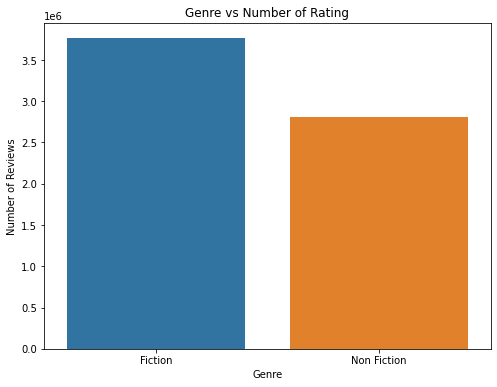

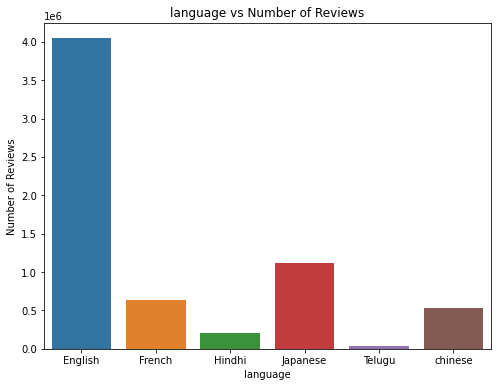

In [ ]:
df_genre_reviews = df.groupby('Genre')['Reviews'].sum().to_frame(name = 'Number of Reviews').reset_index()
plt.figure(figsize = (8,6))
sns.barplot(x = 'Genre', y = 'Number of Reviews', data = df_genre_reviews)
plt.title('Genre vs Number of Rating')
plt.show()

df_language = df.groupby('language')['Reviews'].sum().to_frame(name = 'Number of Reviews').reset_index()
plt.figure(figsize = (8,6))
sns.barplot(x = 'language', y = 'Number of Reviews', data = df_language)
plt.title('language vs Number of Reviews')
plt.show()

Fiction does have a lot more reviews then Non Fiction books.
In english language has more reviews than others

**STEP 15-** top 10 reviewed Authors and Books ?

In [ ]:
top_reviewed_authors = df.groupby('Author')['Reviews'].sum().reset_index().sort_values(by = ['Reviews'], ascending = False)
top_reviewed_books = df.groupby('Name')['Reviews'].sum().reset_index().sort_values(by = ['Reviews'],ascending = False)


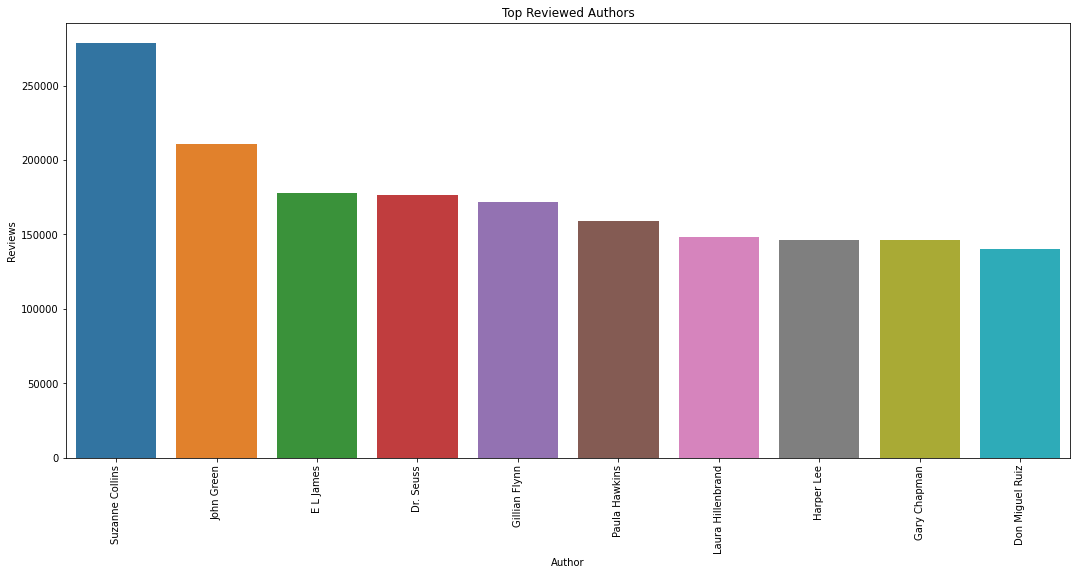

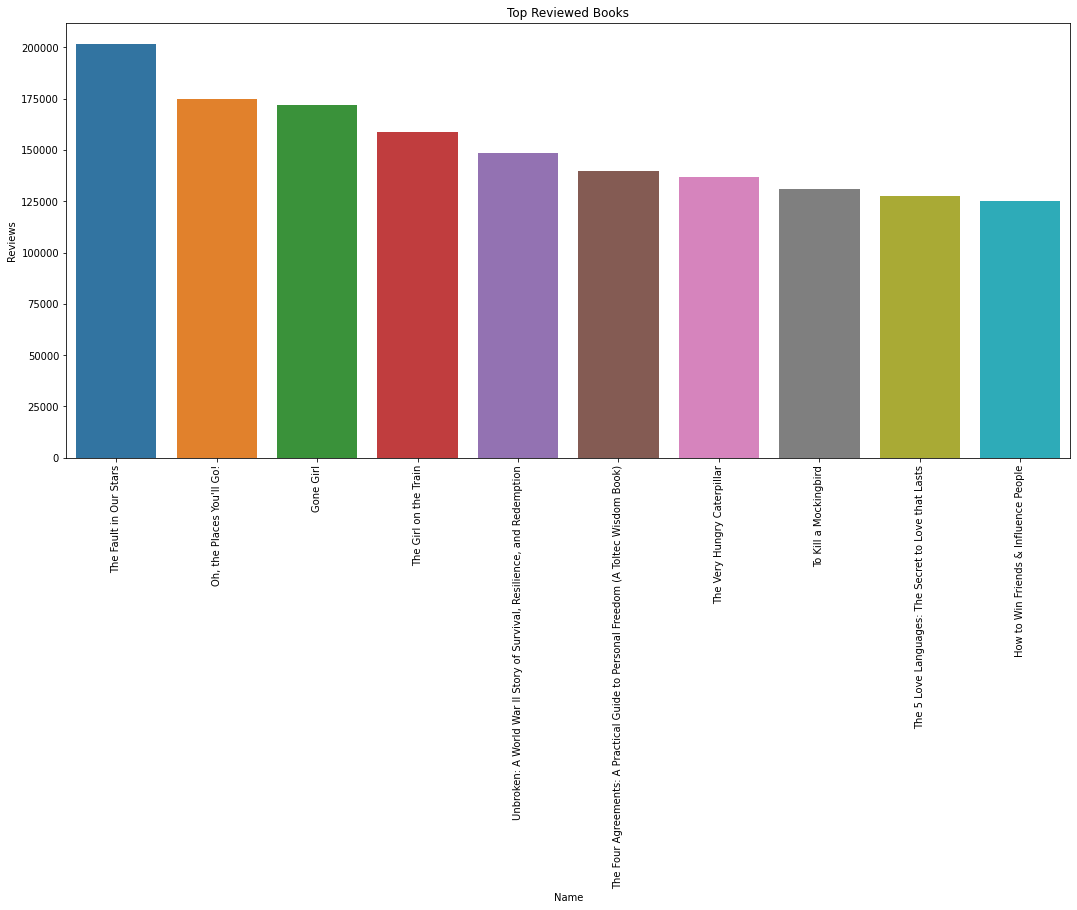

In [ ]:
#top Reviewed Authors
plt.figure (figsize = (18,8))
sns.barplot(x = 'Author', y = 'Reviews', data = top_reviewed_authors.iloc[: 10])
plt.title('Top Reviewed Authors')
plt.xticks(rotation = 90)
plt.show()

#top Reviewed Books
plt.figure (figsize = (18,8))
sns.barplot(x = 'Name', y = 'Reviews', data = top_reviewed_books.iloc[: 10])
plt.title('Top Reviewed Books')
plt.xticks(rotation = 90)
plt.show()




**LINE PLOT**

**STEP 16-** Let's check how ratings affect number of reviews ?

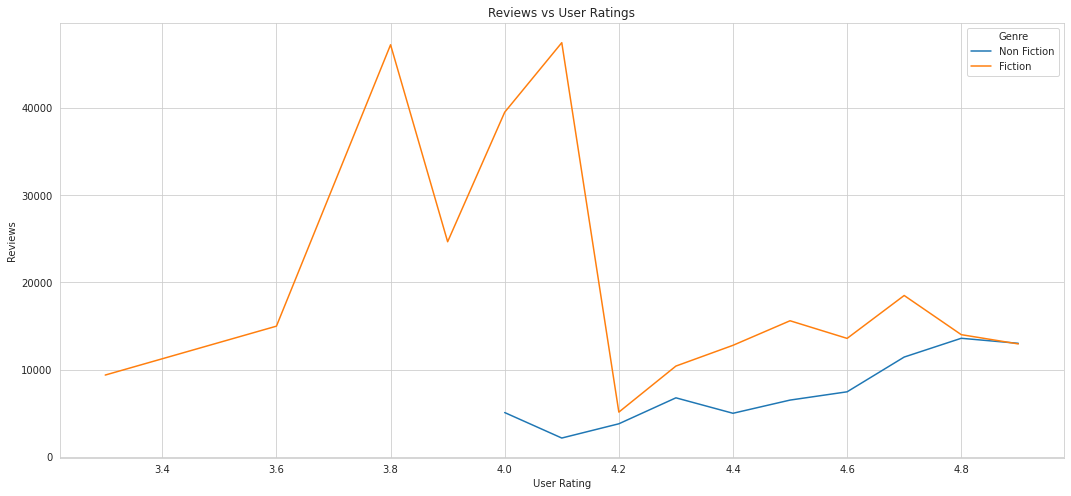

In [ ]:
plt.figure(figsize = (18,8))
sns.set_style("whitegrid")
sns.lineplot(x = 'User Rating', y = 'Reviews', hue = 'Genre', ci = None, data = df)  #Size of confidence intervals to draw around estimated values.
plt.title('Reviews vs User Ratings')
plt.show()

**STEP 17-** Author vs Year?

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


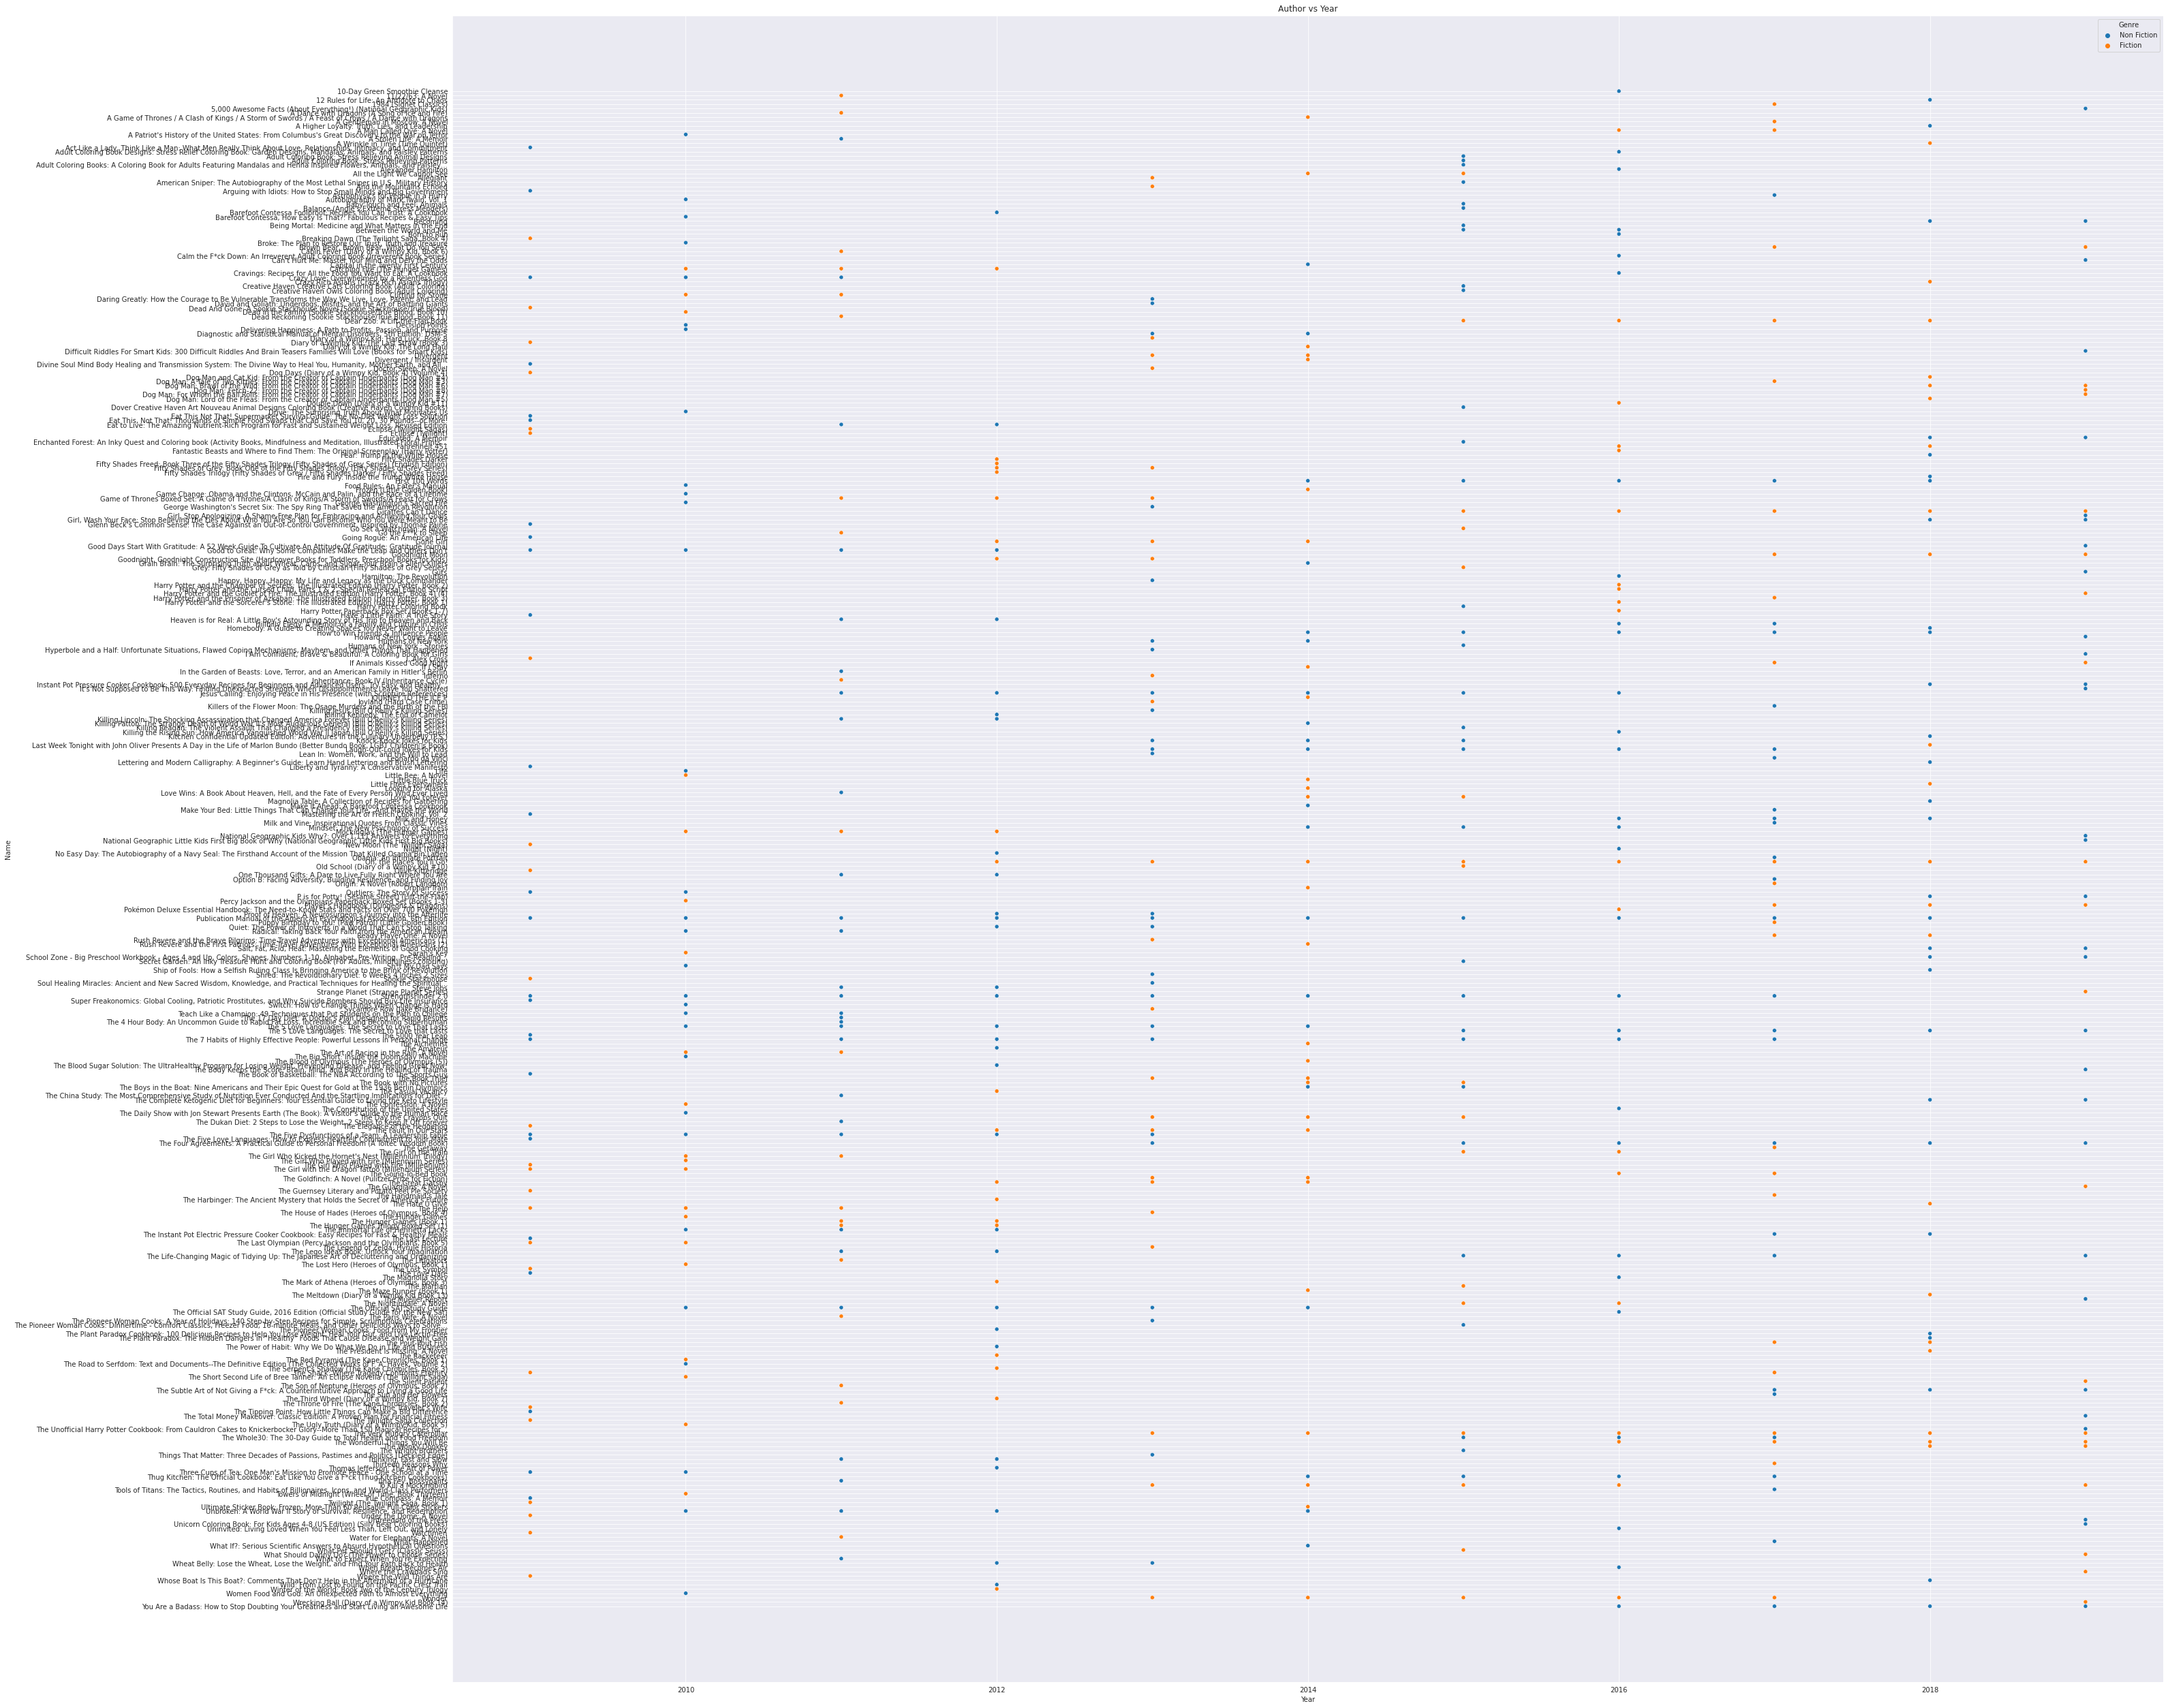

In [ ]:
plt.figure(figsize = (45,45))
sns.set_style('darkgrid')
sns.scatterplot(x = 'Year', y = 'Name', hue = 'Genre' , data = df)  
plt.title('Author vs Year')
plt.show()


**LINE PLOT**

**STEP 18-** To check how Price varied with Year,

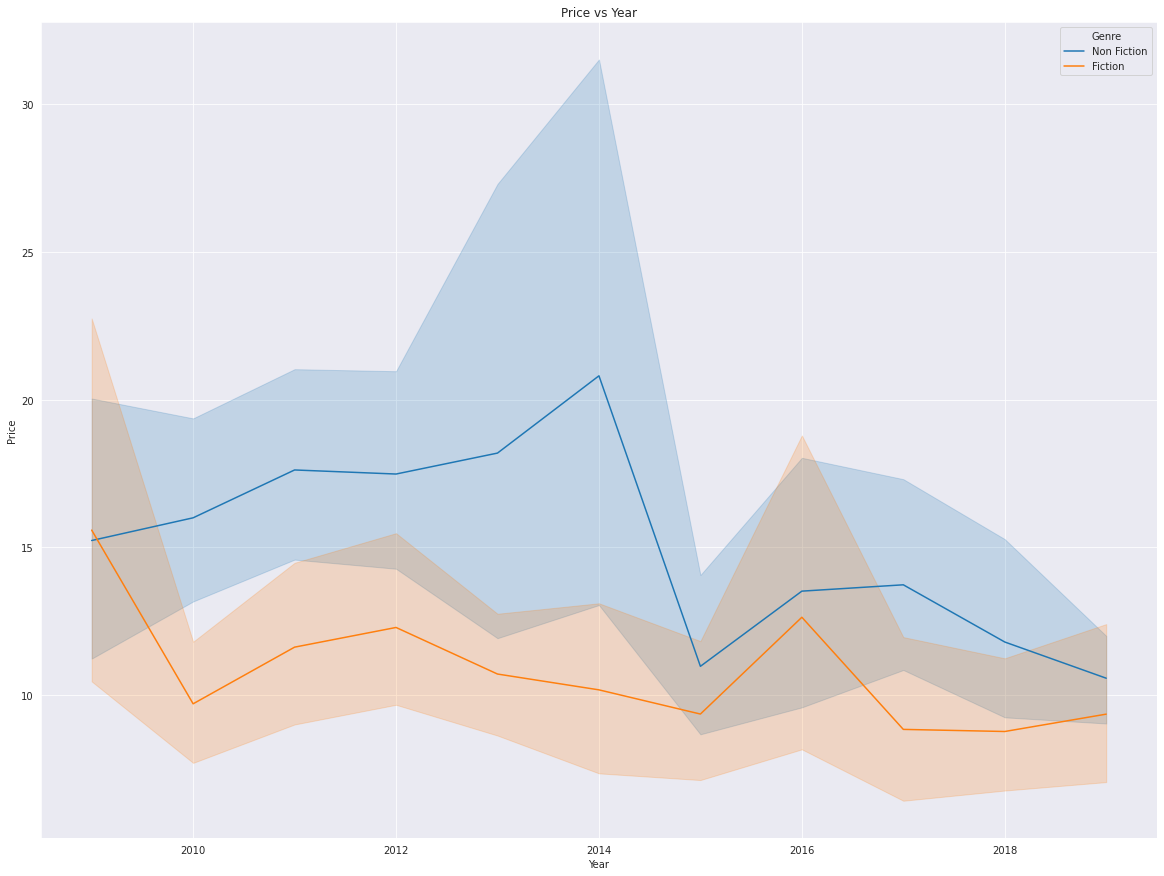

In [ ]:
plt.figure(figsize = (20,15))
sns.set_style('darkgrid') 
sns.lineplot(x = 'Year', y = 'Price', hue = 'Genre', data = df) 
plt.title('Price vs Year')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


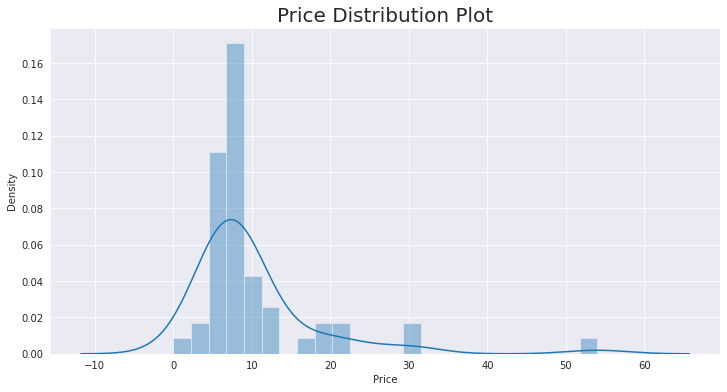

0    8
dtype: int64

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(maxrating['Price'])
plt.title('Price Distribution Plot',fontsize=20)
plt.show()
maxrating['Price'].mode()